In [ ]:
# import the libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Layer, Lambda

In [ ]:
# load the dataset
forestfires = pd.read_csv("/content/forestfires.csv")
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## EDA Process

In [ ]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    int64  
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [ ]:
forestfires.shape

(517, 29)

In [ ]:
#As dummy variables are already created, we will remove the month and also day columns
forestfires.drop(["month", "day"], axis = 1, inplace = True)

In [ ]:
forestfires["area"] = np.where(forestfires["area"] > 50, 1, 0)

In [ ]:
forestfires["area"].value_counts()

0    493
1     24
Name: area, dtype: int64

In [ ]:
forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,0.046422,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,0.210600,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Normalization being done.
def norm_func(i):
     x = (i - i.min()) / (i.max() -	i.min())
     return (x)

In [ ]:
predictors = forestfires.iloc[ :, 0:8]
target = forestfires.iloc[ :, 8]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(predictors, target, test_size =  0.2, stratify = target)

In [ ]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1, len(hidden_dim) - 1):
        if (i == 1):
            model.add(Dense(hidden_dim[i], input_dim = hidden_dim[0], activation = "relu"))
        else: 
            model.add(Dense(hidden_dim[i], activation = "relu"))
    model.add(Dense(hidden_dim[-1], kernel_initializer = "normal", activation = "sigmoid"))
    model.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])
    return model  

In [ ]:
#y_train = pd.DataFrame(y_train)

In [ ]:
first_model = prep_model([8, 50, 40, 20, 1])
first_model.fit(np.array(x_train),np.array(y_train),epochs=750)
pred_train = first_model.predict(np.array(x_train))

Epoch 1/750
13/13 [==============================] - 2s 5ms/step - loss: 0.6755 - accuracy: 0.8354
Epoch 2/750
13/13 [==============================] - 0s 3ms/step - loss: 0.2219 - accuracy: 0.9540
Epoch 3/750
13/13 [==============================] - 0s 4ms/step - loss: 0.2184 - accuracy: 0.9540
Epoch 4/750
13/13 [==============================] - 0s 3ms/step - loss: 0.2442 - accuracy: 0.9153
Epoch 5/750
13/13 [==============================] - 0s 3ms/step - loss: 0.1952 - accuracy: 0.9540
Epoch 6/750
13/13 [==============================] - 0s 3ms/step - loss: 0.1925 - accuracy: 0.9540
Epoch 7/750
13/13 [==============================] - 0s 3ms/step - loss: 0.2041 - accuracy: 0.9540
Epoch 8/750
13/13 [==============================] - 0s 3ms/step - loss: 0.2088 - accuracy: 0.9540
Epoch 9/750
13/13 [==============================] - 0s 3ms/step - loss: 0.2211 - accuracy: 0.9540
Epoch 10/750
13/13 [==============================] - 0s 3ms/step - loss: 0.2014 - accuracy: 0.9540
Epoch 11/

In [ ]:
#Converting the predicted values to series 
pred_train = pd.Series([i[0] for i in pred_train])

size = ["small", "large"]
pred_train_class = pd.Series(["small"]*413)
pred_train_class[[i > 0.5 for i in pred_train]] = "large"

train = pd.concat([x_train, y_train], axis = 1)
train["area"].value_counts()

0    394
1     19
Name: area, dtype: int64

In [ ]:
# Cheking with prediction for training data
from sklearn.metrics import confusion_matrix
train["original_class"] = "small"
train.loc[train["area"] == 1, "original_class"] = "large"
train.original_class.value_counts()
confusion_matrix(pred_train_class, train["original_class"])
np.mean(pred_train_class == pd.Series(train["original_class"]).reset_index(drop = True)) #
pd.crosstab(pred_train_class,pd.Series(train["original_class"]).reset_index(drop = True))

original_class,large,small
row_0,,
large,3,0
small,16,394


In [ ]:
#For test data
pred_test = first_model.predict(np.array(x_test))
pred_test = pd.Series([i[0] for i in pred_test])
pred_test_class = pd.Series(["small"]*104)
pred_test_class[[i>0.5 for i in pred_test]] = "large"
test =pd.concat([x_test, y_test], axis = 1)
test["original_class"] = "small"
test.loc[test["area"] == 1, "original_class"] = "large"

4/4 [==============================] - 0s 4ms/step


In [ ]:
test["original_class"].value_counts()

small    99
large     5
Name: original_class, dtype: int64

In [ ]:
np.mean(pred_test_class==pd.Series(test["original_class"]).reset_index(drop = True)) # 9

0.9519230769230769

In [ ]:
confusion_matrix(pred_test_class,test["original_class"])
pd.crosstab(pred_test_class,pd.Series(test["original_class"]).reset_index(drop = True))

original_class,large,small
row_0,,
small,5,99


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Answer of question no. 2


In [1]:
# import the libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
# load the dataset
turbines = pd.read_csv("/content/gas_turbines.csv")
turbines

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


## EDA Process

In [3]:
turbines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
turbines.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [5]:
turbines.shape

(15039, 11)

In [6]:
turbines[turbines.duplicated()].shape

(0, 11)

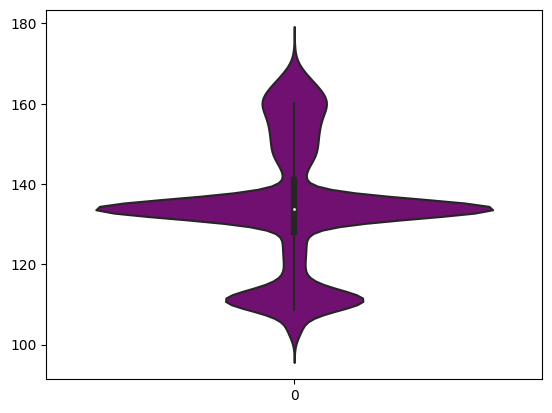

In [7]:
sns.violinplot(turbines['TEY'],color = 'purple')
plt.show()

In [8]:
X = turbines.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= turbines.loc[:,['TEY']]

In [9]:
scaled = StandardScaler()
X = scaled.fit_transform(X)
y = scaled.fit_transform(y)

In [10]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [11]:
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

<ipython-input-11-ae62adc6907d>:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)


Results: -0.18 (0.11) MSE


In [12]:
estimator.fit(X, y)
prediction = estimator.predict(X)
prediction

array([-1.0540804, -1.0426946, -1.054209 , ..., -1.046487 , -1.1148882,
       -1.1329467], dtype=float32)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [15]:
prediction

array([-1.0540804, -1.0426946, -1.054209 , ..., -1.046487 , -1.1148882,
       -1.1329467], dtype=float32)

In [16]:
X = turbines.drop(columns = ['TEY'], axis = 1) 
y = turbines.iloc[:,7]
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [17]:
import tensorflow as tf
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                            tf.keras.layers.Dense(output_size) ])

In [18]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
381/381 - 2s - loss: 2798.9036 - mean_squared_error: 2798.9036 - val_loss: 169.2831 - val_mean_squared_error: 169.2831 - 2s/epoch - 5ms/step
Epoch 2/100
381/381 - 1s - loss: 96.3137 - mean_squared_error: 96.3137 - val_loss: 75.4466 - val_mean_squared_error: 75.4466 - 1s/epoch - 3ms/step
Epoch 3/100
381/381 - 1s - loss: 48.2742 - mean_squared_error: 48.2742 - val_loss: 43.0611 - val_mean_squared_error: 43.0611 - 1s/epoch - 4ms/step
Epoch 4/100
381/381 - 1s - loss: 26.7770 - mean_squared_error: 26.7770 - val_loss: 21.9261 - val_mean_squared_error: 21.9261 - 876ms/epoch - 2ms/step
Epoch 5/100
381/381 - 1s - loss: 14.4022 - mean_squared_error: 14.4022 - val_loss: 10.9114 - val_mean_squared_error: 10.9114 - 761ms/epoch - 2ms/step
Epoch 6/100
381/381 - 1s - loss: 7.4994 - mean_squared_error: 7.4994 - val_loss: 9.3200 - val_mean_squared_error: 9.3200 - 751ms/epoch - 2ms/step
Epoch 7/100
381/381 - 1s - loss: 4.3229 - mean_squared_error: 4.3229 - val_loss: 3.0947 - val_mean_squared_

In [19]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 3ms/step - loss: 1.2239 - mean_squared_error: 1.2239


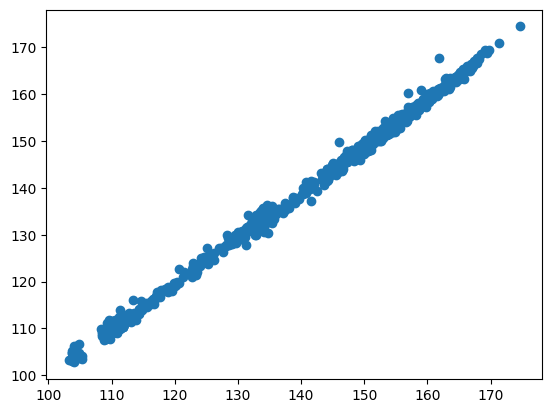

In [20]:
predictions = model.predict_on_batch(X_test_scaled)
plt.scatter(y_test, predictions)
plt.show()

In [21]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,134.292938,0.124246
1,111.88,111.884705,0.004205
2,133.72,133.708664,0.008477
3,133.79,132.742172,0.783188
4,110.77,110.536514,0.210784
...,...,...,...
1499,132.85,133.240311,0.293798
1500,125.07,127.064018,1.594322
1501,160.95,160.430038,0.323058
1502,133.12,132.895630,0.168547
